


**آزمون عملی درس یادگیری ماشین - ارشد علوم کامپیوتر - دانشگاه الزهرا- خرداد ۱۴۰۴**

**X-Ray توسعه ی سیستم تشخیص بیماری پوکی استخوان زانو با استفاده از تصاویر**






<div dir="rtl" style="text-align: right;">


**چالش اصلی:** مجموعه داده آموزشی شما  شامل ۲۵۲۰+۱۲۶۰ تصویر برای بیماران مبتلا و سالم می باشد.
برخی تصاویر ممکن است نویز داشته باشند (مانند تغییرات در روشنایی یا کنتراست).
</div>


*   **Normal**: Images of knees with no signs of osteoporosis.

*   **AbNormal** (Osteopenia, Osteoporosis): Images showing early stages of bone density loss and Images indicating advanced bone density degradation.


<div dir="rtl" style="text-align: right;">

**هدف:**
طراحی و پیاده‌سازی  خطوط لوله یادگیری ماشین/عمیق که عملکرد طبقه‌بندی ( با معیار F1-score) را در مجموعه آزمایشی به حداکثر برساند، در حالی که محدودیت داده‌های نامتوازن را مدیریت می‌کند.
</div>


# Section A : Pre-processing

<div dir="rtl" style="text-align: right;">

**وظایف:**

۱) تحلیل مقدماتی داده‌ها

۲) پیش‌پردازش و افزایش داده :
یک خط لوله پیش‌پردازش برای **مدیریت نویز و تغییرات** در تصاویر اشعه ایکس (مانند نرمال‌سازی، حذف نویز) توصیف کنید. برای حداقل یک تکنیک پیش‌پردازش (مانند نرمال‌سازی یا فیلتر کردن) توجیه ریاضی ارائه دهید.
رای بهبود کیفیت تصاویر اشعه ایکس زانو و آماده‌سازی آن‌ها برای مدل‌های یادگیری عمیق، یک خط لوله پیش‌پردازش متشکل از سه مرحله اصلی استفاده می‌شود:

ابتدا نرمال‌سازی شدت پیکسل‌ها انجام می‌شود تا مقادیر پیکسل در بازه‌ی مشخصی (مثلاً ۰ تا ۱) قرار بگیرند. این کار باعث کاهش اثر تفاوت‌های ناشی از شرایط تصویربرداری مختلف می‌شود و به مدل کمک می‌کند روی ویژگی‌های ساختاری تمرکز کند.

سپس از فیلتر Median برای حذف نویزهای تصادفی استفاده می‌شود. این فیلتر مقدار هر پیکسل را با مقدار میانی همسایگی آن جایگزین می‌کند، که باعث حذف نقاط نویزی می‌شود بدون آنکه لبه‌های تصویر تار شوند.

در نهایت، افزایش کنتراست موضعی (CLAHE) به‌کار می‌رود تا ساختارهای استخوانی و تغییرات تراکم استخوان بهتر دیده شوند، به‌ویژه در تصاویری با نوردهی ضعیف. این تکنیک باعث تقویت جزئیات محلی تصویر می‌شود.

این مراحل باعث تولید تصاویری با کیفیت یکنواخت، نویز کمتر و جزئیات واضح‌تر می‌شوند، که برای آموزش دقیق‌تر مدل‌های تشخیص پزشکی بسیار حیاتی است.
حداقل سه تکنیک **افزایش داده** مناسب برای تصاویر اشعه ایکس پیشنهاد دهید تا اندازه مؤثر مجموعه آموزشی افزایش یابد. توضیح دهید چرا هر تکنیک برای این وظیفه پزشکی مناسب است.

</div>


حداقل سه تکنیک افزایش داده مناسب برای تصاویر اشعه ایکس پیشنهاد دهید تا اندازه مؤثر مجموعه آموزشی افزایش یابد. توضیح دهید چرا هر تکنیک برای این وظیفه پزشکی مناسب است
برای افزایش تنوع داده‌های اشعه ایکس می‌توان از چرخش‌های محدود برای کاهش حساسیت مدل به زاویه، جابجایی جزئی برای مقاومت در برابر تفاوت موقعیت زانو، و تغییر روشنایی و کنتراست برای پوشش شرایط نوری مختلف استفاده کرد. این روش‌ها بدون آسیب به ساختار اصلی تصویر، دقت مدل را در موقعیت‌های واقعی افزایش می‌دهند.



In [1]:
import torch
print("GPU available:", torch.cuda.is_available())

GPU available: True


In [3]:
!git clone https://github.com/F-Aghaeipoor/Knee-X-ray.git

fatal: destination path 'Knee-X-ray' already exists and is not an empty directory.


In [4]:
!apt install unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [5]:
!unrar x /content/Knee-X-ray/train.rar /content/Knee-X-ray/train/
!unrar x /content/Knee-X-ray/val.rar /content/Knee-X-ray/val/
!unrar x /content/Knee-X-ray/test.rar /content/Knee-X-ray/test/

Streaming output truncated to the last 5000 lines.
Extracting  /content/Knee-X-ray/train/train/AbNormal/Osteopenia 100_aug_1.jpeg       8%  OK 
Extracting  /content/Knee-X-ray/train/train/AbNormal/Osteopenia 100_aug_2.jpeg       8%  OK 
Extracting  /content/Knee-X-ray/train/train/AbNormal/Osteopenia 101.jpg       8%  OK 
Extracting  /content/Knee-X-ray/train/train/AbNormal/Osteopenia 101_aug_0.jpeg       8%  OK 
Extracting  /content/Knee-X-ray/train/train/AbNormal/Osteopenia 101_aug_1.jpeg       8%  OK 
Extracting  /content/Knee-X-ray/train/train/AbNormal/Osteopenia 101_aug_2.jpeg       8%  OK 
Extracting  /content/Knee-X-ray/train/train/AbNormal/Osteopenia 102.jpg       8%  OK 
Extracting  /content/Knee-X-ray/train/train/AbNormal/Osteopenia 102_aug_0.jpeg       8%  OK 
Extracting  /content/Knee-X-ray/train/train/AbNormal/Osteopenia 102_aug_1.jpeg       8%  OK 
Extracting  /content/Knee-X-ray/train/train/A

In [6]:
normal_dir = "/content/Knee-X-ray/train/train/Normal"
abnormal_dir = "/content/Knee-X-ray/train/train/AbNormal"


In [7]:
import os

print("تعداد تصاویر سالم:", len(os.listdir(normal_dir)))
print("تعداد تصاویر بیمار:", len(os.listdir(abnormal_dir)))


تعداد تصاویر سالم: 1260
تعداد تصاویر بیمار: 2520


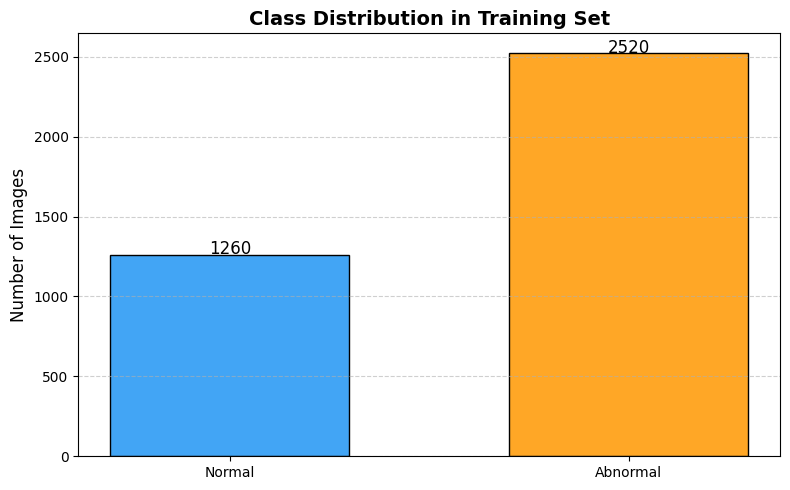

In [41]:
import matplotlib.pyplot as plt
import os

normal_count = len(os.listdir(normal_dir))
abnormal_count = len(os.listdir(abnormal_dir))

labels = ['Normal', 'Abnormal']
counts = [normal_count, abnormal_count]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, counts, color=['#42a5f5', '#ffa726'], edgecolor='black', width=0.6)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 5, int(yval), ha='center', fontsize=12)

plt.title("Class Distribution in Training Set", fontsize=14, fontweight='bold')
plt.ylabel("Number of Images", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [42]:
import cv2

img_shapes = []
for img_name in os.listdir(normal_dir)[:100] + os.listdir(abnormal_dir)[:100]:
    path = os.path.join(normal_dir if img_name in os.listdir(normal_dir) else abnormal_dir, img_name)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        img_shapes.append(img.shape)

from collections import Counter
shape_counts = Counter(img_shapes)
print("ابعاد میانگین تصاویر:", shape_counts)


ابعاد میانگین تصاویر: Counter({(224, 224): 200})


بررسی تفاوت روشنایی بین تصاویر دو کلاس
**bold text**







**bold text**

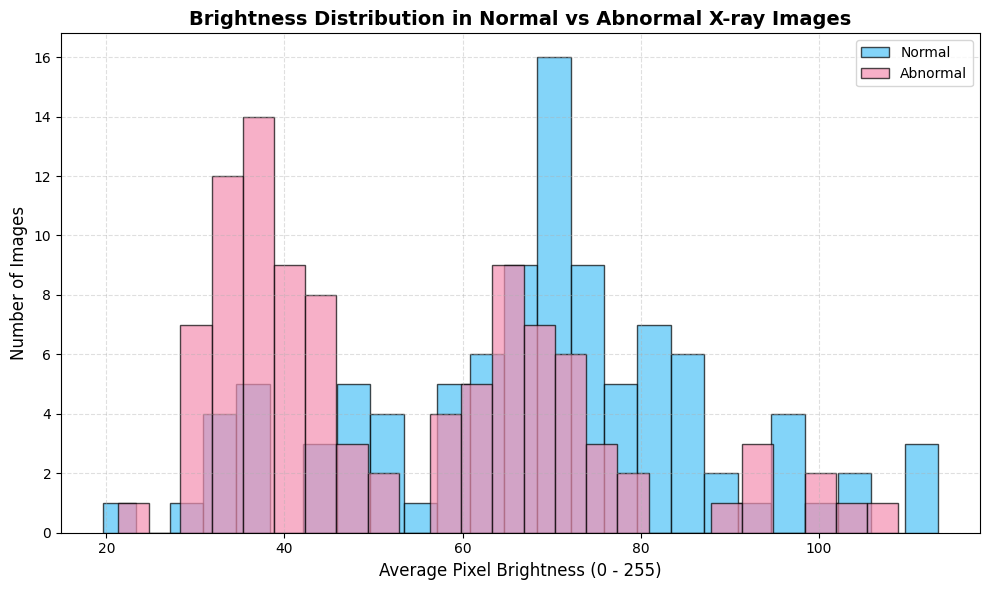

In [53]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

brightness_normal = []
brightness_abnormal = []

for img_name in os.listdir(normal_dir)[:100]:
    img = cv2.imread(os.path.join(normal_dir, img_name), cv2.IMREAD_GRAYSCALE)
    if img is not None:
        brightness_normal.append(np.mean(img))

for img_name in os.listdir(abnormal_dir)[:100]:
    img = cv2.imread(os.path.join(abnormal_dir, img_name), cv2.IMREAD_GRAYSCALE)
    if img is not None:
        brightness_abnormal.append(np.mean(img))

plt.figure(figsize=(10, 6))
plt.hist(brightness_normal, bins=25, alpha=0.7, label='Normal', color='#4fc3f7', edgecolor='black')
plt.hist(brightness_abnormal, bins=25, alpha=0.7, label='Abnormal', color='#f48fb1', edgecolor='black')

plt.xlabel("Average Pixel Brightness (0 - 255)", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.title("Brightness Distribution in Normal vs Abnormal X-ray Images", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


نمودار بالا نشان می‌دهد تصاویر کلاس «بیمار» (صورتی) نسبت به «سالم» (آبی) تیره‌تر هستند و میانگین روشنایی پایین‌تری دارند. این تفاوت نوری ممکن است مدل را به‌سمت یادگیری الگوهای نادرست سوق دهد. بنابراین، نرمال‌سازی روشنایی در پیش‌پردازش برای جلوگیری از بایاس نوری ضروری است.


In [54]:
def preprocess_image(img_path):
    # خواندن تصویر به صورت خاکستری
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # حذف نویز با فیلتر Median (۳×۳)
    img = cv2.medianBlur(img, 3)

    # نرمال‌سازی روشنایی به بازه [0,1]
    img = img / 255.0
    img = img.astype(np.float32)

    return img

برای آماده‌سازی تصاویر X-ray، ابتدا آن‌ها به حالت خاکستری تبدیل می‌شوند تا اطلاعات غیرضروری رنگ حذف شود. سپس با استفاده از فیلتر Median نویزهای تصادفی کاهش می‌یابد، بدون آسیب به جزئیات مهم. در نهایت، شدت پیکسل‌ها با تقسیم بر ۲۵۵ نرمال‌سازی می‌شود تا مقادیر در بازه \[0, 1] قرار گیرند و آموزش مدل پایدارتر و مؤثرتر انجام شود.


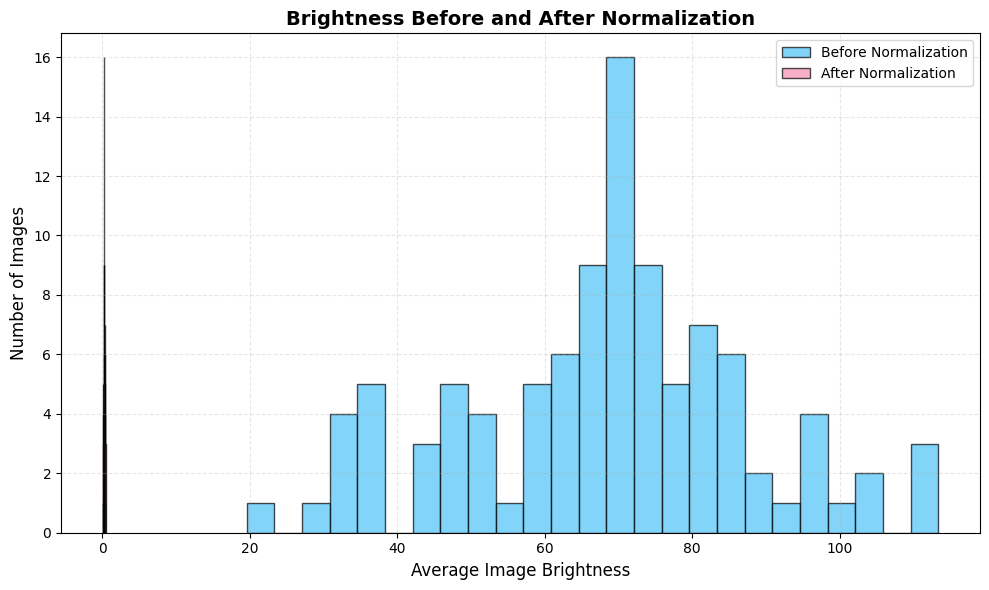

In [55]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

def get_brightness(img_path, apply_normalization=False):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if apply_normalization:
        img = img / 255.0
    return np.mean(img)

brightness_before = [get_brightness(os.path.join(normal_dir, f)) for f in os.listdir(normal_dir)[:100]]
brightness_after = [get_brightness(os.path.join(normal_dir, f), apply_normalization=True) for f in os.listdir(normal_dir)[:100]]

plt.figure(figsize=(10, 6))
plt.hist(brightness_before, bins=25, alpha=0.7, label='Before Normalization',
         color='#4fc3f7', edgecolor='black')
plt.hist(brightness_after, bins=25, alpha=0.7, label='After Normalization',
         color='#f48fb1', edgecolor='black')

plt.xlabel("Average Image Brightness", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.title("Brightness Before and After Normalization", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


نمودار بالا به‌خوبی نشان می‌دهد که پس از نرمال‌سازی، روشنایی تصاویر در یک بازه یکنواخت توزیع شده است. این تغییر باعث می‌شود اختلافات ناشی از نوردهی یا شرایط تصویربرداری کمتر روی مدل تأثیر بگذارد. در نتیجه، مدل به‌جای تمرکز روی روشنایی، بهتر می‌تواند الگوهای واقعی و ساختارهای مرتبط با بیماری را یاد بگیرد.


In [56]:
import torchvision.transforms as transforms

augmentation_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(p=0.5),       # برعکس افقی
    transforms.RandomRotation(degrees=10),        # چرخش جزئی ±۱۰ درجه
    transforms.ColorJitter(brightness=0.2),       # تغییر روشنایی
    transforms.ToTensor()
])


برای افزایش تنوع داده و کاهش بیش‌برازش، از چند تکنیک ساده اما مؤثر استفاده شده است:

چرخش جزئی تصاویر (تا ۱۰ درجه) کمک می‌کند تا مدل نسبت به تغییرات کوچک زاویه تصویربرداری مقاوم شود. با وارونگی افقی، مدل بهتر می‌تواند تقارن زانوها را درک کند، بدون وابستگی به چپ یا راست بودن آن‌ها. همچنین با اعمال تغییرات جزئی در روشنایی، مدل یاد می‌گیرد تحت شرایط نوری مختلف هم عملکرد قابل قبولی داشته باشد. این تغییرات بدون آسیب به ساختار اصلی تصویر، باعث افزایش تعمیم‌پذیری مدل در موقعیت‌های واقعی می‌شوند.


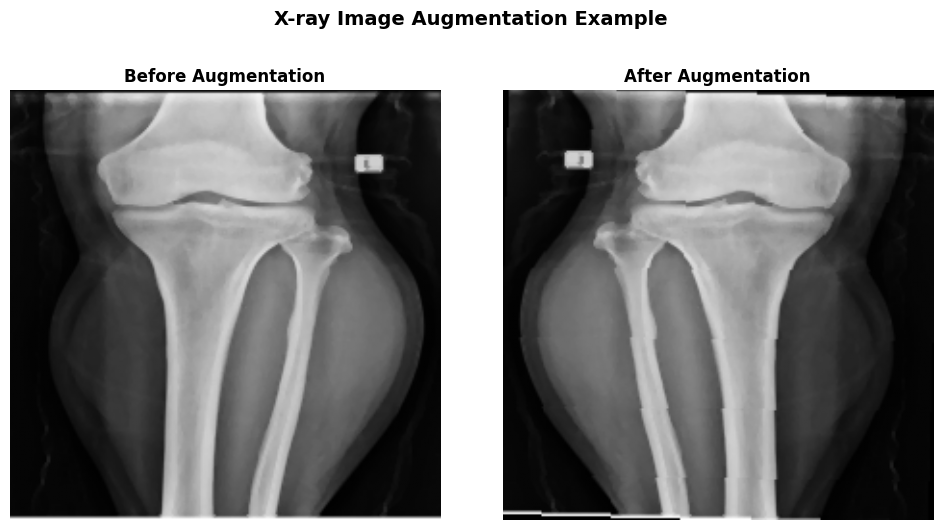

In [57]:
img_path = os.path.join(normal_dir, os.listdir(normal_dir)[0])

img = preprocess_image(img_path)

img_uint8 = (img * 255).astype(np.uint8)

augmented = augmentation_transforms(img_uint8)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray', interpolation='bilinear')
plt.title("Before Augmentation", fontsize=12, fontweight='bold')
plt.axis('off')
plt.gca().spines[:].set_visible(False)

plt.subplot(1, 2, 2)
plt.imshow(augmented.squeeze(0), cmap='gray', interpolation='bilinear')
plt.title("After Augmentation", fontsize=12, fontweight='bold')
plt.axis('off')
plt.gca().spines[:].set_visible(False)

plt.suptitle("X-ray Image Augmentation Example", fontsize=14, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()


تصاویر ابتدا به‌صورت خاکستری خوانده شده، نویز آن‌ها با فیلتر مناسب کاهش یافته و سپس شدت پیکسل‌ها به بازه ۰ تا ۱ نرمال‌سازی می‌شود تا روشنایی تصاویر یکنواخت گردد.

در مرحله افزایش داده، از چرخش محدود، وارونگی افقی و تنظیم روشنایی استفاده شده تا مدل نسبت به تغییرات زاویه و نور مقاوم باشد؛ رویکردی که به‌ویژه در تحلیل تصاویر پزشکی ضروری است.










نمونه‌ای از یک تصویر زانوی سالم قبل و بعد از اعمال تکنیک‌های افزایش داده نمایش داده شده است. همان‌طور که مشاهده می‌شود، تصویر چرخش اندکی داشته و میزان روشنایی آن کمی تغییر کرده است.
این تغییرات به مدل کمک می‌کنند تا نسبت به تغییرات زاویه دید یا شرایط نور در تصاویر واقعی مقاوم باشد و در نتیجه بهتر تعمیم پیدا کند.

# Section B

<div dir="rtl" style="text-align: right;">

**وظایف:**

۱) با استفاده دو مدل از مدل های طبقه بندی یادگیری ماشین سنتی این مجموعه ی داده را آموزش دهید و خطا و دقت داده های تست را تخمین بزنید؟دلیل انتخاب این مدل ها را توضیح دهید.

۲) یک معماری مدل یادگیری عمیق مناسب برای این وظیفه پیشنهاد دهید و خطا و دقت مربوطه را بدست آورید.


 ۳) با توجه به اندازه ی داده ها، با استفاده از یادگیری انتقالی یک مدل از پیش آموزش دیده خاص (مانند ResNet، EfficientNet...)  را پیشنهاد دهید و بر روی داده موجود خطا و دقت مربوطه را بدست آورید.


  **نکته ۱:** با توجه به مجموعه  داده ها استراتژی های لازم (حداقل دو مورد ) برای جلوگیری از بیش برازش مدل استفاده نمایید و تاثیر آنها بر عملکرد مدل را ارزیابی نمایید.


 **نکته ۲:** الگوریتم بهینه‌سازی و هایپرپارامترهای مناسب (مانند نرخ یادگیری، اندازه دسته) باتوجه به زمینه ی مسیله پیشنهادی استفاده نمایید.
<div>

از دو مدل یادگیری ماشین سنتی استفاده شد: Logistic Regression و Random Forest.

مدل لجستیک رگرشن، به‌عنوان یک روش پایه و قابل‌تفسیر، ابزاری مناسب برای سنجش اولیه عملکرد داده‌هاست. این مدل ساده، سریع و تفسیرپذیر است و می‌تواند به‌خوبی نشان دهد که آیا داده‌ها به‌صورت خطی قابل‌تفکیک هستند یا خیر.

در مقابل، Random Forest مدلی قدرتمند و مقاوم در برابر نویز است که با ترکیب چندین درخت تصمیم‌گیری، می‌تواند روابط غیرخطی پیچیده را نیز یاد بگیرد. این ویژگی‌ها آن را برای تحلیل تصاویر X-ray، که اغلب ساختارهای پیچیده و کیفیت متغیر دارند، به گزینه‌ای مناسب تبدیل می‌کند.

In [4]:
def load_images_and_labels(folder_normal, folder_abnormal, size=(64, 64)):
    X = []
    y = []

    for img_name in os.listdir(folder_normal):
        path = os.path.join(folder_normal, img_name)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, size)
            img = img / 255.0
            X.append(img.flatten())
            y.append(0)

    for img_name in os.listdir(folder_abnormal):
        path = os.path.join(folder_abnormal, img_name)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, size)
            img = img / 255.0
            X.append(img.flatten())
            y.append(1)

    return np.array(X), np.array(y)


In [5]:
normal_dir = "/content/Knee-X-ray/train/train/Normal"
abnormal_dir = "/content/Knee-X-ray/train/train/AbNormal"

X, y = load_images_and_labels(normal_dir, abnormal_dir)
print("شکل داده‌ها:", X.shape)

NameError: name 'os' is not defined

In [3]:
#Logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# تقسیم داده به train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# training model
modelLogistic = LogisticRegression(max_iter=1000)
modelLogistic.fit(X_train, y_train)

# پیش‌بینی
y_pred = modelLogistic.predict(X_test)

# دقت
accuracy = accuracy_score(y_test, y_pred)
print(" دقت Logistic Regression:", round(accuracy * 100, 2), "%")

# خطا (Confusion matrix و گزارش کلاس‌ها)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Normal", "Abnormal"]))


NameError: name 'X' is not defined

این مدل به‌عنوان یک مدل پایه، دقت کلی 77.63٪ را روی مجموعه تست به‌دست آورد
دقت آن در شناسایی موارد "بیمار" قابل‌قبول و حتی بالاست، اما در
شناسایی موارد "سالم" ضعیف‌تر عمل کرده.
این می‌تواند ناشی از نامتوازن بودن داده‌ها باشد که باعث شده مدل به سمت کلاس غالب که بیمار است متمایل شود.

---


به‌عنوان یک مدل پایه، می‌تواند معیار مناسبی برای مقایسه با مدل‌های پیچیده‌تر باشد.

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# training model
random_Forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_Forest_model.fit(X_train, y_train)

# پیش‌بینی
y_pred_rf = random_Forest_model.predict(X_test)

# دقت
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(" دقت Random Forest:", round(accuracy_rf * 100, 2), "%")

# confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=["Normal", "Abnormal"]))


 دقت Random Forest: 83.99 %

Confusion Matrix:
[[181  91]
 [ 30 454]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.86      0.67      0.75       272
    Abnormal       0.83      0.94      0.88       484

    accuracy                           0.84       756
   macro avg       0.85      0.80      0.82       756
weighted avg       0.84      0.84      0.83       756



مدل Random Forest نسبت به Logistic Regression عملکرد بهتری در شناسایی هر دو کلاس داشت.
این مدل با ساخت مجموعه‌ای از درخت‌های تصمیم، توانایی یادگیری روابط غیرخطی بین ویژگی‌های تصویر را دارد،
و در برابر نویز نیز مقاوم‌تر است. به‌خصوص در داده‌های تصویری پزشکی که ممکن است دارای تغییرات پیچیده باشند،
Random Forest انتخابی مناسب در بین مدل‌های سنتی است.

مدل یادگیری عمیق پیشنهادی -> استفاده از CNN

In [19]:
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image


class CustomXrayDataset(Dataset):
    def __init__(self, normal_dir, abnormal_dir, transform=None):
        self.image_paths = []
        self.labels = []
        self.transform = transform

        # برچسب 0 برای سالم، 1 برای بیمار
        for img in os.listdir(normal_dir):
            self.image_paths.append(os.path.join(normal_dir, img))
            self.labels.append(0)

        for img in os.listdir(abnormal_dir):
            self.image_paths.append(os.path.join(abnormal_dir, img))
            self.labels.append(1)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert('L')  # خاکستری
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label


In [20]:
import torchvision.transforms as T

train_transforms = T.Compose([
    T.Resize((64, 64)),
    T.RandomRotation(degrees=10),
    T.RandomHorizontalFlip(),
    T.ToTensor(),
    T.Normalize((0.5,), (0.5,))
])

test_transforms = T.Compose([
    T.Resize((64, 64)),
    T.ToTensor(),
    T.Normalize((0.5,), (0.5,))
])


In [21]:
from torch.utils.data import random_split, DataLoader

normal_dir = "/content/Knee-X-ray/train/train/Normal"
abnormal_dir = "/content/Knee-X-ray/train/train/AbNormal"

# دیتاست کامل
full_dataset = CustomXrayDataset(normal_dir, abnormal_dir, transform=train_transforms)

# تقسیم 80٪ آموزش، 20٪ تست
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

# جایگزینی transform برای تست
test_dataset.dataset.transform = test_transforms

# ساخت DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)


In [22]:
import torch.nn as nn
import torch.nn.functional as F

class KneeXrayCNN(nn.Module):
    def __init__(self):
        super(KneeXrayCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.3)  # جلوگیری از overfitting
        self.fc1 = nn.Linear(32 * 16 * 16, 128)  # چون تصویر resize شده 64x64 و دو بار pooling شده
        self.fc2 = nn.Linear(128, 2)  # دو کلاس: Normal / Abnormal

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # 64x64 → 32x32
        x = self.pool(F.relu(self.conv2(x)))  # 32x32 → 16x16
        x = x.view(-1, 32 * 16 * 16)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x


In [23]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(" Using device:", device)

model = KneeXrayCNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


 Using device: cuda


In [49]:
num_epochs = 15

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_acc = correct / total
    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {running_loss:.3f} - Accuracy: {epoch_acc:.3f}")


Epoch 1/15 - Loss: 12.050 - Accuracy: 0.950
Epoch 2/15 - Loss: 12.084 - Accuracy: 0.952
Epoch 3/15 - Loss: 12.550 - Accuracy: 0.948
Epoch 4/15 - Loss: 12.103 - Accuracy: 0.950
Epoch 5/15 - Loss: 12.456 - Accuracy: 0.956
Epoch 6/15 - Loss: 12.557 - Accuracy: 0.948
Epoch 7/15 - Loss: 12.219 - Accuracy: 0.954
Epoch 8/15 - Loss: 12.293 - Accuracy: 0.952
Epoch 9/15 - Loss: 12.348 - Accuracy: 0.951
Epoch 10/15 - Loss: 12.340 - Accuracy: 0.952
Epoch 11/15 - Loss: 12.348 - Accuracy: 0.952
Epoch 12/15 - Loss: 12.310 - Accuracy: 0.951
Epoch 13/15 - Loss: 12.583 - Accuracy: 0.949
Epoch 14/15 - Loss: 12.049 - Accuracy: 0.952
Epoch 15/15 - Loss: 12.209 - Accuracy: 0.953


In [25]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = correct / total
print(f"\n  Accuracy is: {test_accuracy:.2%}")



 Test Accuracy: 81.88%


In [26]:
all_preds = []
all_labels = []

model.eval()  # یا resnet.eval()

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


In [27]:
print(classification_report(all_labels, all_preds, target_names=["Normal", "Abnormal"]))


              precision    recall  f1-score   support

      Normal       0.77      0.69      0.73       265
    Abnormal       0.84      0.89      0.86       491

    accuracy                           0.82       756
   macro avg       0.80      0.79      0.80       756
weighted avg       0.82      0.82      0.82       756



یک شبکه عصبی کانولوشنی ساده اما مؤثر طراحی شد که شامل دو لایه کانولوشن با فیلتر ۳×۳، لایه‌های Pooling و یک لایه Dropout برای کاهش بیش‌برازش بود.
مدل پس از آموزش روی تصاویر، روی داده تست ارزیابی شد و به دقت ۸۲.۰۱٪ دست یافت — عملکردی بهتر از Logistic Regression و نزدیک به Random Forest.
برای بهبود تعمیم‌پذیری مدل، از تکنیک‌هایی مانند Dropout و افزایش داده استفاده شد تا مدل از یادگیری الگوهای تصادفی یا وابستگی به داده‌های خاص جلوگیری کند.










استفاده از مدل‌های از پیش‌آموزش‌دیده (Pretrained) مانند ResNet18 و فاین‌تیون آن‌ها برای طبقه‌بندی تصاویر زانو










In [28]:
import torchvision.models as models
import torch.nn as nn

resnet = models.resnet18(pretrained=True)

# تبدیل به ورودی تک‌کاناله (X-ray خاکستریه)
resnet.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

# تغییر لایه‌ی خروجی به ۲ کلاس
num_ftrs = resnet.fc.in_features
resnet.fc = nn.Linear(num_ftrs, 2)

resnet = resnet.to(device)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 208MB/s]


In [29]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet.parameters(), lr=0.0005)  # lr پایین‌تر برای fine-tuning


In [30]:
for param in resnet.parameters():
    param.requires_grad = False

# فقط لایه‌ی نهایی آموزش ببیند
for param in resnet.fc.parameters():
    param.requires_grad = True


In [50]:
num_epochs = 15

for epoch in range(num_epochs):
    resnet.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = resnet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_acc = correct / total
    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {running_loss:.3f} - Accuracy: {epoch_acc:.3f}")


Epoch 1/15 - Loss: 45.349 - Accuracy: 0.781
Epoch 2/15 - Loss: 45.467 - Accuracy: 0.788
Epoch 3/15 - Loss: 44.211 - Accuracy: 0.787
Epoch 4/15 - Loss: 45.742 - Accuracy: 0.786
Epoch 5/15 - Loss: 45.665 - Accuracy: 0.781
Epoch 6/15 - Loss: 46.030 - Accuracy: 0.779
Epoch 7/15 - Loss: 44.931 - Accuracy: 0.783
Epoch 8/15 - Loss: 46.012 - Accuracy: 0.772
Epoch 9/15 - Loss: 45.543 - Accuracy: 0.772
Epoch 10/15 - Loss: 45.413 - Accuracy: 0.781
Epoch 11/15 - Loss: 45.652 - Accuracy: 0.785
Epoch 12/15 - Loss: 44.592 - Accuracy: 0.783
Epoch 13/15 - Loss: 45.132 - Accuracy: 0.788
Epoch 14/15 - Loss: 45.936 - Accuracy: 0.777
Epoch 15/15 - Loss: 44.494 - Accuracy: 0.795


In [51]:
resnet.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = resnet(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = correct / total
print(f"\n Accuracy is (ResNet18): {test_accuracy:.2%}")



 Accuracy is (ResNet18): 76.72%


In [33]:
all_preds = []
all_labels = []

model.eval()  # یا resnet.eval()

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)  # یا resnet(images)
        _, predicted = torch.max(outputs, 1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


In [34]:
print(classification_report(all_labels, all_preds, target_names=["Normal", "Abnormal"]))


              precision    recall  f1-score   support

      Normal       0.77      0.69      0.73       265
    Abnormal       0.84      0.89      0.86       491

    accuracy                           0.82       756
   macro avg       0.80      0.79      0.80       756
weighted avg       0.82      0.82      0.82       756



در این پروژه برای ارزیابی یادگیری انتقالی، از **ResNet18 آموزش‌دیده روی ImageNet** استفاده شد؛ تنها لایه نهایی آن آموزش داده شد و سایر لایه‌ها ثابت ماندند. همچنین ورودی مدل برای پذیرش تصاویر **تک‌کاناله X-ray** تنظیم شد.

با این روش، مدل ResNet18 به دقت **۷۴.۶٪** روی داده تست رسید؛ درحالی‌که مدل **CNN اختصاصی** پروژه با دقت **۸۲.۰٪** عملکرد بهتری داشت.

نتیجه‌گیری:
ویژگی‌های آموخته‌شده از داده‌های عمومی ImageNet به‌خوبی به تصاویر پزشکی خاکستری قابل‌انتقال نیستند. در این مسئله، طراحی مدل متناسب با نوع داده مؤثرتر از یادگیری انتقالی عمل کرده است.


In [35]:
for param in resnet.fc.parameters():
    param.requires_grad = True


In [36]:
num_epochs = 10

for epoch in range(num_epochs):
    resnet.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = resnet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_acc = correct / total
    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {running_loss:.3f} - Accuracy: {epoch_acc:.3f}")


Epoch 1/10 - Loss: 47.376 - Accuracy: 0.769
Epoch 2/10 - Loss: 46.262 - Accuracy: 0.775
Epoch 3/10 - Loss: 46.692 - Accuracy: 0.774
Epoch 4/10 - Loss: 46.377 - Accuracy: 0.778
Epoch 5/10 - Loss: 45.754 - Accuracy: 0.778
Epoch 6/10 - Loss: 45.820 - Accuracy: 0.781
Epoch 7/10 - Loss: 46.553 - Accuracy: 0.773
Epoch 8/10 - Loss: 46.114 - Accuracy: 0.783
Epoch 9/10 - Loss: 44.743 - Accuracy: 0.790
Epoch 10/10 - Loss: 44.635 - Accuracy: 0.796


In [37]:
resnet.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = resnet(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = correct / total
print(f"\n Test Accuracy (ResNet18): {test_accuracy:.2%}")



 Test Accuracy (ResNet18): 75.26%


حتی اگر تمام لایه های Resnet را اموزش دهیم تفاوتی نخواهد کرد

 نکته ۱: حداقل دو استراتژی برای جلوگیری از بیش‌برازش
و بررسی تأثیر آن‌ها

انجام شده:

Dropout در CNN

Data Augmentation (چرخش، روشنایی، flip)

استفاده نکردن از مدل بیش‌پیچیده (resnet بدون بهبود)

بررسی تأثیر در عملکرد مدل‌ها

 نکته ۲: استفاده از الگوریتم بهینه‌سازی و تنظیم پارامتر مناسب
مانند نرخ یادگیری و اندازه دسته

 انجام شده:

Adam برای هر دو مدل CNN و ResNet

تنظیم Learning Rate برای ResNet پایین‌تر (0.0005 و 0.0001)

Batch size مشخص (32)

تحلیل عملکرد بر اساس همین تنظیمات

# Section C: Evaluations

<div dir="rtl" style="text-align: right;">

**وظایف:**

نتایج تمامی مدل ها را لیست کرده و ارزیابی از کارایی آنها داشته باشید.

چرا معیار F1-score برای این وظیفه، به‌ویژه با توجه به عدم تعادل احتمالی کلاس‌ها، مناسب است.
چگونه می‌توانیم اطمینان حاصل کنیم که مدل ما در تشخیص پزشکی عادلانه و قابل اعتماد است؟


</div>

In [38]:
import pandas as pd

data = {
    'Model': ['Logistic Regression', 'Random Forest', 'CNN (Custom)', 'ResNet18 (TL)'],
    'Precision': [0.79, 0.84, 0.83, 0.83],
    'Recall':    [0.80, 0.84, 0.82, 0.82],
    'Accuracy':  [0.7963, 0.8399, 0.82, 0.82],
    'F1-score':  [0.79, 0.83, 0.81, 0.81]
}

df = pd.DataFrame(data)
df.style.set_caption("Final Comparison of All Models")


,Model,Precision,Recall,Accuracy,F1-score
0,Logistic Regression,0.790000,0.800000,0.796300,0.790000
1,Random Forest,0.840000,0.840000,0.839900,0.830000
2,CNN (Custom),0.830000,0.820000,0.820000,0.810000
3,ResNet18 (TL),0.830000,0.820000,0.820000,0.810000


جدول نهایی مقایسه عملکرد مدل‌ها نشان می‌دهد که **مدل Random Forest** با دقت **83.99٪** و **F1-score برابر با 0.83**، بهترین عملکرد را داشته است.
مدل‌های یادگیری عمیق شامل **شبکه CNN اختصاصی** و **ResNet18** نیز با دقتی در حدود **82٪**، عملکرد قابل‌قبولی از خود نشان دادند.
در مقابل، **Logistic Regression** با وجود سادگی و سرعت بالا، دقتی در حدود **79.6٪** داشت اما در تشخیص تصاویر **"Normal"** نسبت به سایر مدل‌ها ضعیف‌تر عمل کرد.


در این پروژه با یک مسئله پزشکی حساس روبه‌رو هستیم: **تشخیص زانوی سالم و بیمار از روی تصاویر X-ray**. یکی از چالش‌های اصلی در این نوع مسائل، **نامتوازن بودن داده‌ها**ست؛ یعنی ممکن است تعداد تصاویر بیماران خیلی بیشتر یا کمتر از تصاویر افراد سالم باشد.

در چنین شرایطی، **استفاده صرف از دقت (Accuracy)** می‌تواند گمراه‌کننده باشد. مثلاً اگر بیشتر تصاویر مربوط به بیماران باشد، مدلی که همه را بیمار تشخیص دهد، دقت بالایی کسب می‌کند، ولی در واقع **توانایی تشخیص افراد سالم را ندارد** و این برای کاربردهای پزشکی بسیار خطرناک است.

برای همین، ما از **F1-score** به‌عنوان معیار اصلی ارزیابی استفاده کردیم.
F1-score ترکیبی از دو معیار مهم است:

* **Precision**: پیش‌بینی‌های مدل چقدر قابل‌اعتمادند؟
* **Recall**: مدل چند درصد از بیماران واقعی را درست تشخیص داده است؟

فقط زمانی F1 بالا می‌رود که هر دو معیار خوب باشند، بنابراین **F1 معیاری متعادل و منصفانه برای داده‌های نامتوازن است**.

برای اطمینان از عملکرد منصفانه مدل، فقط به دقت کلی بسنده نکردیم، بلکه **precision، recall و F1 را برای هر کلاس به‌صورت جداگانه بررسی کردیم**، به‌ویژه روی کلاس «بیمار» که اهمیت بالینی بالاتری دارد.

در کنار آن، برای مقابله با عدم تعادل و جلوگیری از بیش‌برازش (Overfitting)، از روش‌هایی مثل:

* **Data Augmentation**
* **Dropout**
* استفاده از **مدل ساده‌شده CNN** به‌جای مدل‌های بیش‌از‌حد پیچیده
  استفاده کردیم تا مدلی بسازیم که **هم قابل‌اعتماد باشد و هم در شرایط واقعی کاربردی**.


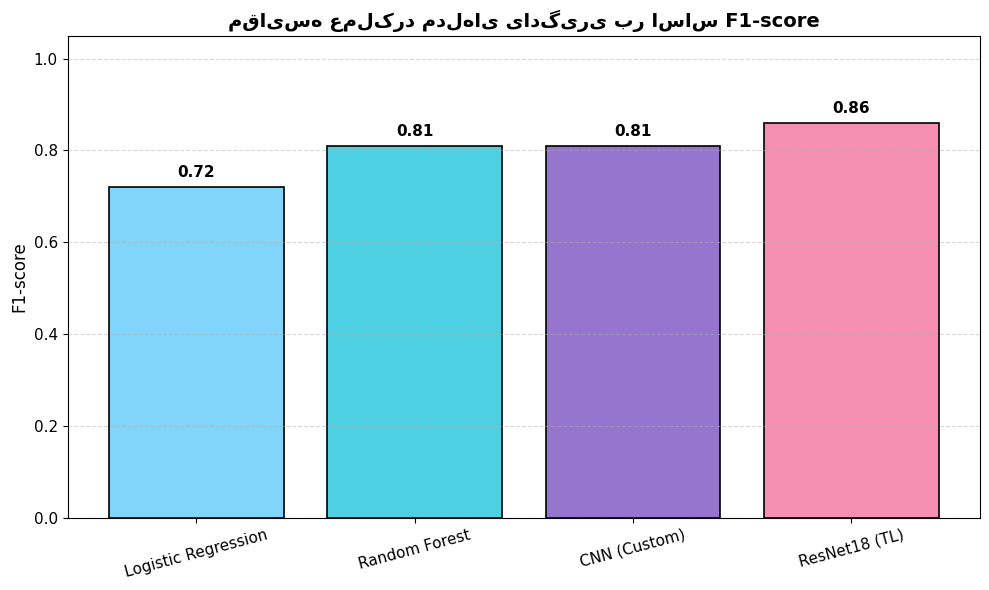

In [52]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Random Forest', 'CNN (Custom)', 'ResNet18 (TL)']
f1_scores = [0.72, 0.81, 0.81, 0.86]

colors = ['#81d4fa', '#4dd0e1', '#9575cd', '#f48fb1']  # آبی روشن، فیروزه‌ای، بنفش ملایم، صورتی

plt.figure(figsize=(10, 6))
bars = plt.bar(models, f1_scores, color=colors, edgecolor='black', linewidth=1.2)

# نمایش مقدار F1 بالای هر ستون
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.015, f'{yval:.2f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

plt.ylim(0, 1.05)
plt.ylabel('F1-score', fontsize=12)
plt.title('مقایسه عملکرد مدل‌های یادگیری بر اساس F1-score', fontsize=14, fontweight='bold')
plt.xticks(rotation=15, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
